<a href="https://colab.research.google.com/github/Anugrah142002/StockPrice-Prediction/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #install finance API
 !pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import libraries
from __future__ import absolute_import, division, print_function

import pathlib
import seaborn as sns

import pandas as pd
import yfinance as yf
import numpy as np
import tweepy
from textblob import TextBlob 
from wordcloud import WordCloud
import re  
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [ ]:
#procuring required stock data
tickers = ["ITC.NS"]   #CREATING A LIST OF TICKERS

df_stockdata=yf.download(tickers, start = "2023-03-22", end= "2023-04-10")  #entering time period during which data is reqd and assigning data to dataframe

df_stockdata=df_stockdata.drop('Close',axis=1)

df_stockdata

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Adj Close,Volume
Date,,,,,
2023-03-22,376.950012,378.850006,374.200012,377.750000,4774867
2023-03-23,377.000000,382.750000,374.399994,380.649994,9752326
2023-03-24,381.500000,383.000000,378.000000,378.700012,9934501
2023-03-27,377.950012,384.399994,376.350006,380.200012,10816352
2023-03-28,380.200012,382.350006,378.149994,379.750000,9170535
2023-03-29,380.200012,384.000000,377.149994,382.750000,10160322
2023-03-31,382.000000,384.500000,380.000000,383.500000,9511189
2023-04-03,384.000000,384.000000,378.500000,378.899994,7059200
2023-04-05,378.899994,387.049988,378.899994,386.399994,11608424


In [ ]:
#calculating HLPCT and PCT Change
df_stockdata['HLPCT']=(df_stockdata['High']-df_stockdata['Low'])/(df_stockdata['High'])
df_stockdata['PCTChange']=(df_stockdata['Open']-df_stockdata['Adj Close'])/(df_stockdata['Open'])
df_stockdata


,Open,High,Low,Adj Close,Volume,HLPCT,PCTChange
Date,,,,,,,
2023-03-22,376.950012,378.850006,374.200012,377.750000,4774867,0.012274,-0.002122
2023-03-23,377.000000,382.750000,374.399994,380.649994,9752326,0.021816,-0.009682
2023-03-24,381.500000,383.000000,378.000000,378.700012,9934501,0.013055,0.007339
2023-03-27,377.950012,384.399994,376.350006,380.200012,10816352,0.020942,-0.005953
2023-03-28,380.200012,382.350006,378.149994,379.750000,9170535,0.010985,0.001184
2023-03-29,380.200012,384.000000,377.149994,382.750000,10160322,0.017839,-0.006707
2023-03-31,382.000000,384.500000,380.000000,383.500000,9511189,0.011704,-0.003927
2023-04-03,384.000000,384.000000,378.500000,378.899994,7059200,0.014323,0.013281
2023-04-05,378.899994,387.049988,378.899994,386.399994,11608424,0.021057,-0.019794


In [ ]:
 #shifting Adj CLose so we can predict Adj Close of the next day
 df_stockdata['Adj Close'] = df_stockdata['Adj Close'].shift(-1)
 #n= df_stockdata.shape[0]
 #df_stockdata.iloc[n-1 , df_stockdata.columns.get_loc('Adj Close')] =  1406.568765 #fill with Adj Close of that day
 df_stockdata.drop(df_stockdata.tail(1).index,inplace=True)
 df_stockdata

,Open,High,Low,Adj Close,Volume,HLPCT,PCTChange
Date,,,,,,,
2023-03-22,376.950012,378.850006,374.200012,380.649994,4774867,0.012274,-0.002122
2023-03-23,377.000000,382.750000,374.399994,378.700012,9752326,0.021816,-0.009682
2023-03-24,381.500000,383.000000,378.000000,380.200012,9934501,0.013055,0.007339
2023-03-27,377.950012,384.399994,376.350006,379.750000,10816352,0.020942,-0.005953
2023-03-28,380.200012,382.350006,378.149994,382.750000,9170535,0.010985,0.001184
2023-03-29,380.200012,384.000000,377.149994,383.500000,10160322,0.017839,-0.006707
2023-03-31,382.000000,384.500000,380.000000,378.899994,9511189,0.011704,-0.003927
2023-04-03,384.000000,384.000000,378.500000,386.399994,7059200,0.014323,0.013281
2023-04-05,378.899994,387.049988,378.899994,387.350006,11608424,0.021057,-0.019794


In [ ]:
# Twitter API credentials
consumerKey = "XPvfviWAiwRUV46bXcyMXSDwC"
consumerSecret = "d1KEsDaus6rXRrHO75YWD9yM4s7FDzGRwgU51LdrahejLsGvdk"
accessToken = "1361226920986255364-j06AKZmWjXGdKxPU7alwb593CLnj5d"
accessTokenSecret = "8noqEZTxdxhGAer6DLJvOUus3W6t4vyrd8ecKqDljHisW"

In [ ]:
# Create the authentication object
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
auth.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth information
api = tweepy.API(auth, wait_on_rate_limit = True)

# verifying whether its working

try:
  api.verify_credentials()
  print("Authentication OK")
except:
  print("Error during authentication")


Authentication OK


In [ ]:
# extracting tweets for itc using keywords

tweets = tweepy.Cursor(api.search_tweets,
              q= "#ITC", lang="en").items(1000)
 
twitter_deets= [[tweet.text, tweet.created_at] for tweet in tweets]
 
tweet_text = pd.DataFrame(data=twitter_deets, 
                    columns=['tweet','date'])
tweet_text

,tweet,date
0,RT @IndiaWallstreet: Cement stocks volume trac...,2023-04-10 04:40:09+00:00
1,RT @IndiaWallstreet: Cement stocks volume trac...,2023-04-10 04:40:03+00:00
2,RT @IndiaWallstreet: Cement stocks volume trac...,2023-04-10 04:40:00+00:00
3,Cement stocks volume traction. \n\nUltratech\n...,2023-04-10 04:39:42+00:00
4,"#ITC 🇮🇳 on the #BSE #Block of 26,00,226 shares...",2023-04-10 04:29:50+00:00
...,...,...
665,RT @anehgu: It can only be God 🙏🏾 #itc2023 #IT...,2023-04-01 02:58:56+00:00
666,"RT @kshitiz_1994: #kotakbank Rs 22,500 profit....",2023-04-01 02:30:01+00:00
667,RT @anehgu: It can only be God 🙏🏾 #itc2023 #IT...,2023-04-01 01:10:57+00:00
668,This is my collection of ITC devices and paran...,2023-04-01 00:49:32+00:00


In [ ]:
#sentiment analysis

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #to remove mentions
  text= re.sub(r'#', '', text) #to remove hashtags
  text= re.sub(r'RT[\s]+', '', text) #to remove 'RT'
  text= re.sub(r'\n[\s]+', '', text) 
  text= re.sub(r'\n[\s]+', '', text)
  text= re.sub(r':[\s]+', '', text)
  text= re.sub(r'https?:\/\/\S+', '', text) #to remove hyperlinks

  return text

tweet_text['tweet']=   tweet_text['tweet'].apply(cleanTxt)
tweet_text 

,tweet,date
0,Cement stocks volume traction. Ultratech\nGras...,2023-04-10 04:40:09+00:00
1,Cement stocks volume traction. Ultratech\nGras...,2023-04-10 04:40:03+00:00
2,Cement stocks volume traction. Ultratech\nGras...,2023-04-10 04:40:00+00:00
3,Cement stocks volume traction. Ultratech\nGras...,2023-04-10 04:39:42+00:00
4,"ITC 🇮🇳 on the BSE Block of 26,00,226 shares at...",2023-04-10 04:29:50+00:00
...,...,...
665,It can only be God 🙏🏾 itc2023 ITC,2023-04-01 02:58:56+00:00
666,"_1994kotakbank Rs 22,500 profit. Call given on...",2023-04-01 02:30:01+00:00
667,It can only be God 🙏🏾 itc2023 ITC,2023-04-01 01:10:57+00:00
668,This is my collection of ITC devices and paran...,2023-04-01 00:49:32+00:00


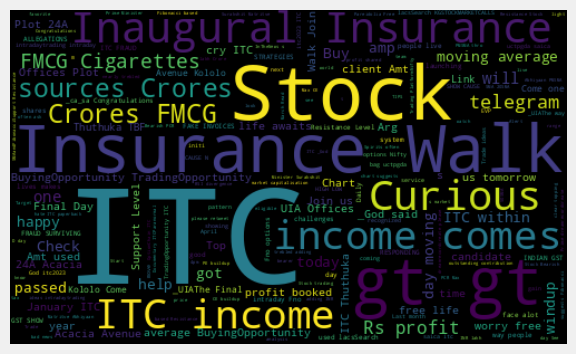

In [ ]:
#creating a Wordcloud to visualize data
allWords= ' '.join( [tweet for tweet in tweet_text['tweet']] )
wordCloud= WordCloud(width=500, height= 300, random_state= 21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity  

tweet_text['Subjectivity']= tweet_text['tweet'].apply(getSubjectivity)
tweet_text['Polarity']= tweet_text['tweet'].apply(getPolarity)

tweet_text

,tweet,date,Subjectivity,Polarity
0,Cement stocks volume traction. Ultratech\nGras...,2023-04-10 04:40:09+00:00,0.0,0.0
1,Cement stocks volume traction. Ultratech\nGras...,2023-04-10 04:40:03+00:00,0.0,0.0
2,Cement stocks volume traction. Ultratech\nGras...,2023-04-10 04:40:00+00:00,0.0,0.0
3,Cement stocks volume traction. Ultratech\nGras...,2023-04-10 04:39:42+00:00,0.0,0.0
4,"ITC 🇮🇳 on the BSE Block of 26,00,226 shares at...",2023-04-10 04:29:50+00:00,0.1,0.3
...,...,...,...,...
665,It can only be God 🙏🏾 itc2023 ITC,2023-04-01 02:58:56+00:00,1.0,0.0
666,"_1994kotakbank Rs 22,500 profit. Call given on...",2023-04-01 02:30:01+00:00,0.0,0.0
667,It can only be God 🙏🏾 itc2023 ITC,2023-04-01 01:10:57+00:00,1.0,0.0
668,This is my collection of ITC devices and paran...,2023-04-01 00:49:32+00:00,0.0,0.0


<Axes: xlabel='date'>

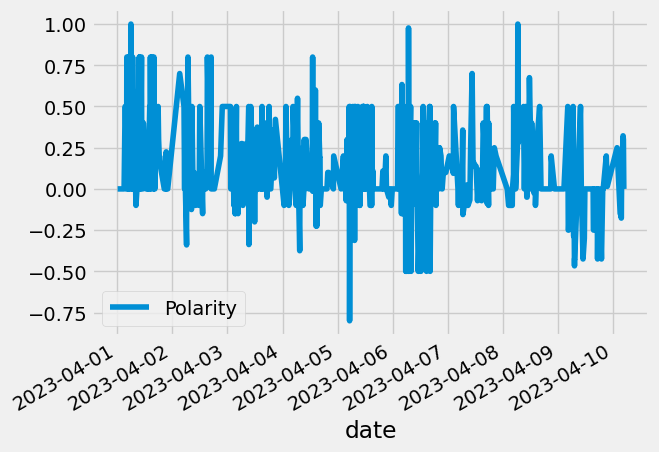

In [ ]:
tweet_text.plot(x='date', y='Polarity')

In [ ]:
tweet_text= tweet_text.drop('tweet', axis=1)
tweet_text


,date,Subjectivity,Polarity
0,2023-04-10 04:40:09+00:00,0.0,0.0
1,2023-04-10 04:40:03+00:00,0.0,0.0
2,2023-04-10 04:40:00+00:00,0.0,0.0
3,2023-04-10 04:39:42+00:00,0.0,0.0
4,2023-04-10 04:29:50+00:00,0.1,0.3
...,...,...,...
665,2023-04-01 02:58:56+00:00,1.0,0.0
666,2023-04-01 02:30:01+00:00,0.0,0.0
667,2023-04-01 01:10:57+00:00,1.0,0.0
668,2023-04-01 00:49:32+00:00,0.0,0.0


In [ ]:
# removing time info from date column

tweet_text['date'] = pd.DatetimeIndex(tweet_text['date']).date
tweet_text

,date,Subjectivity,Polarity
0,2023-04-10,0.0,0.0
1,2023-04-10,0.0,0.0
2,2023-04-10,0.0,0.0
3,2023-04-10,0.0,0.0
4,2023-04-10,0.1,0.3
...,...,...,...
665,2023-04-01,1.0,0.0
666,2023-04-01,0.0,0.0
667,2023-04-01,1.0,0.0
668,2023-04-01,0.0,0.0


In [ ]:
#making date column in df_stockdata so we can merge both dataframes

df_stockdata.index = pd.DatetimeIndex(df_stockdata.index).date
df_stockdata['date']= df_stockdata.index
df_stockdata = df_stockdata.reset_index()
df_stockdata

,index,Open,High,Low,Adj Close,Volume,HLPCT,PCTChange,date
0,2023-03-22,376.950012,378.850006,374.200012,380.649994,4774867,0.012274,-0.002122,2023-03-22
1,2023-03-23,377.000000,382.750000,374.399994,378.700012,9752326,0.021816,-0.009682,2023-03-23
2,2023-03-24,381.500000,383.000000,378.000000,380.200012,9934501,0.013055,0.007339,2023-03-24
3,2023-03-27,377.950012,384.399994,376.350006,379.750000,10816352,0.020942,-0.005953,2023-03-27
4,2023-03-28,380.200012,382.350006,378.149994,382.750000,9170535,0.010985,0.001184,2023-03-28
5,2023-03-29,380.200012,384.000000,377.149994,383.500000,10160322,0.017839,-0.006707,2023-03-29
6,2023-03-31,382.000000,384.500000,380.000000,378.899994,9511189,0.011704,-0.003927,2023-03-31
7,2023-04-03,384.000000,384.000000,378.500000,386.399994,7059200,0.014323,0.013281,2023-04-03
8,2023-04-05,378.899994,387.049988,378.899994,387.350006,11608424,0.021057,-0.019794,2023-04-05


In [ ]:
#merging both dataframes, df_stockdata and tweet_text

df_stockdata['date']= df_stockdata['date'].astype(str)
tweet_text['date']= tweet_text['date'].astype(str)
final= pd.merge(df_stockdata, tweet_text, how= "inner")
final= final.drop('date', axis=1)
final

,index,Open,High,Low,Adj Close,Volume,HLPCT,PCTChange,Subjectivity,Polarity
0,2023-04-03,384.000000,384.000000,378.500000,386.399994,7059200,0.014323,0.013281,0.750000,0.421875
1,2023-04-03,384.000000,384.000000,378.500000,386.399994,7059200,0.014323,0.013281,0.200000,0.066667
2,2023-04-03,384.000000,384.000000,378.500000,386.399994,7059200,0.014323,0.013281,0.464286,0.357143
3,2023-04-03,384.000000,384.000000,378.500000,386.399994,7059200,0.014323,0.013281,0.000000,0.000000
4,2023-04-03,384.000000,384.000000,378.500000,386.399994,7059200,0.014323,0.013281,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
203,2023-04-05,378.899994,387.049988,378.899994,387.350006,11608424,0.021057,-0.019794,0.335000,0.040000
204,2023-04-05,378.899994,387.049988,378.899994,387.350006,11608424,0.021057,-0.019794,0.000000,0.000000
205,2023-04-05,378.899994,387.049988,378.899994,387.350006,11608424,0.021057,-0.019794,0.000000,0.000000
206,2023-04-05,378.899994,387.049988,378.899994,387.350006,11608424,0.021057,-0.019794,0.350000,0.200000


In [ ]:
dataset= final.copy()

In [ ]:
#splitting dataset into train and test data

train_dataset= dataset.sample(frac= 0.8, random_state=0)
test_dataset= dataset.drop(train_dataset.index)

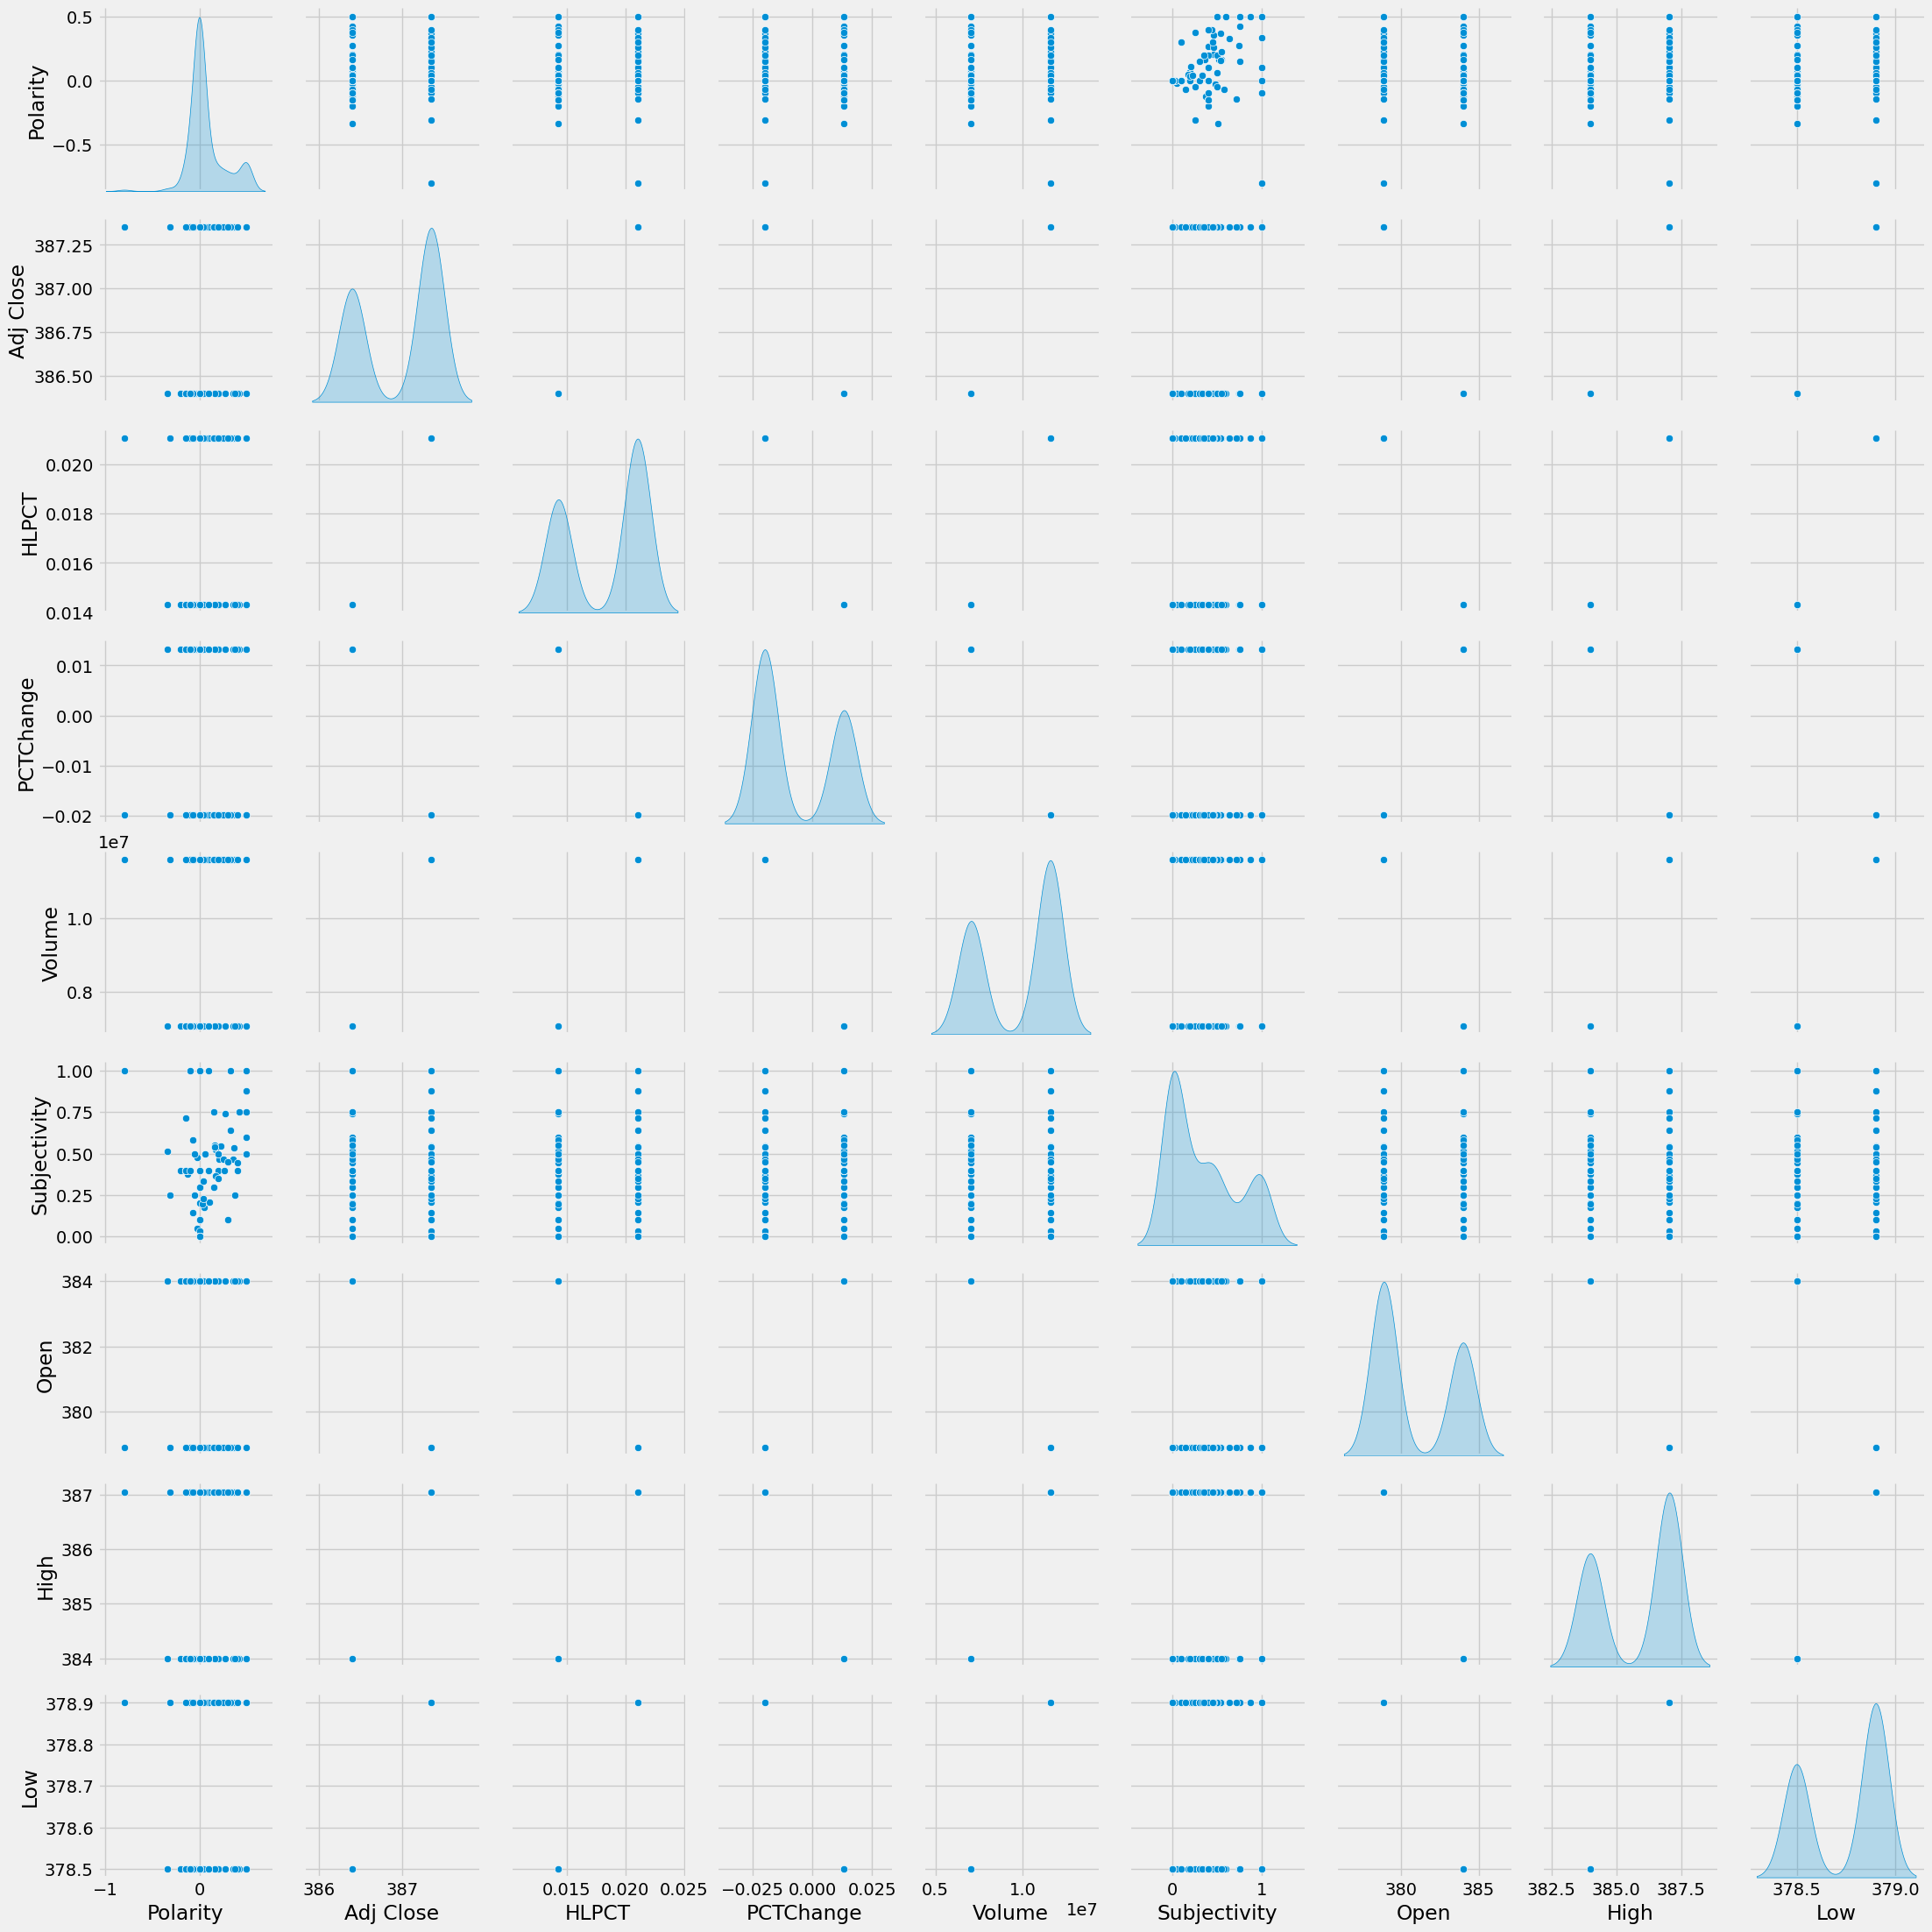

In [ ]:
#creating a pairplot to help visualize data

sns.pairplot(final[['Polarity','Adj Close','HLPCT', 'PCTChange','Volume', 'Subjectivity', 'Open','High','Low']], diag_kind= "kde")

In [ ]:
#get stats for the current datasets

train_stats= train_dataset.describe()
train_stats= train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Open,166.0,3.809277e+02,2.503495e+00,3.789000e+02,3.789000e+02,3.789000e+02,3.840000e+02,3.840000e+02
High,166.0,3.858373e+02,1.497180e+00,3.840000e+02,3.840000e+02,3.870500e+02,3.870500e+02,3.870500e+02
Low,166.0,3.787410e+02,1.963493e-01,3.785000e+02,3.785000e+02,3.789000e+02,3.789000e+02,3.789000e+02
Adj Close,166.0,3.869723e+02,4.663427e-01,3.864000e+02,3.864000e+02,3.873500e+02,3.873500e+02,3.873500e+02
Volume,166.0,9.799696e+06,2.233126e+06,7.059200e+06,7.059200e+06,1.160842e+07,1.160842e+07,1.160842e+07
HLPCT,166.0,1.837941e-02,3.305482e-03,1.432292e-02,1.432292e-02,2.105670e-02,2.105670e-02,2.105670e-02
PCTChange,166.0,-6.643678e-03,1.623608e-02,-1.979414e-02,-1.979414e-02,-1.979414e-02,1.328127e-02,1.328127e-02
Subjectivity,166.0,3.499959e-01,3.727081e-01,0.000000e+00,0.000000e+00,2.500000e-01,5.486111e-01,1.000000e+00
Polarity,166.0,7.906956e-02,1.840858e-01,-3.125000e-01,0.000000e+00,0.000000e+00,1.500000e-01,5.000000e-01


In [ ]:
#assigning labels

train_labels= train_dataset.pop('Adj Close')
test_labels= test_dataset.pop('Adj Close')

In [ ]:
#create a function to normalize data

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data= norm(train_dataset)
normed_test_data= norm(test_dataset)

In [ ]:
normed_train_data

,Adj Close,HLPCT,High,Low,Open,PCTChange,Polarity,Subjectivity,Volume,index
12,NaN,-1.227202,-1.227202,-1.227202,1.227202,1.227202,-0.429526,-0.939062,-1.227202,NaN
80,NaN,-1.227202,-1.227202,-1.227202,1.227202,1.227202,-0.429526,-0.939062,-1.227202,NaN
33,NaN,-1.227202,-1.227202,-1.227202,1.227202,1.227202,-1.515976,0.134164,-1.227202,NaN
5,NaN,-1.227202,-1.227202,-1.227202,1.227202,1.227202,2.286599,0.402471,-1.227202,NaN
187,NaN,0.809953,0.809953,0.809953,-0.809953,-0.809953,-0.429526,1.744003,0.809953,NaN
...,...,...,...,...,...,...,...,...,...,...
128,NaN,0.809953,0.809953,0.809953,-0.809953,-0.809953,0.783128,0.521718,0.809953,NaN
34,NaN,-1.227202,-1.227202,-1.227202,1.227202,1.227202,-0.429526,-0.134142,-1.227202,NaN
28,NaN,-1.227202,-1.227202,-1.227202,1.227202,1.227202,-0.429526,-0.939062,-1.227202,NaN
114,NaN,0.809953,0.809953,0.809953,-0.809953,-0.809953,0.158968,-0.380090,0.809953,NaN


In [ ]:
#convert dataframes to tensors
arr1 = normed_train_data.to_numpy()
arr1 = np.delete(arr1,0 , 1)
arr1 = np.delete(arr1,8 , 1)
normed_train_data_1= tf.convert_to_tensor(arr1, dtype= tf.float32)

arr2 = normed_test_data.to_numpy()
arr2 = np.delete(arr2,0 , 1)
arr2 = np.delete(arr2,8 , 1)
normed_test_data_1= tf.convert_to_tensor(arr2, dtype= tf.float32)

arr3 = train_labels.to_numpy()
train_labels_1= tf.convert_to_tensor(arr3, dtype= tf.float32)

arr4 = test_labels.to_numpy()
test_labels_1= tf.convert_to_tensor(arr4, dtype= tf.float32)

normed_train_data_1

<tf.Tensor: shape=(166, 8), dtype=float32, numpy=
array([[-1.2272017 , -1.2272017 , -1.2272017 , ..., -0.4295256 ,
        -0.9390617 , -1.2272017 ],
       [-1.2272017 , -1.2272017 , -1.2272017 , ..., -0.4295256 ,
        -0.9390617 , -1.2272017 ],
       [-1.2272017 , -1.2272017 , -1.2272017 , ..., -1.5159756 ,
         0.13416423, -1.2272017 ],
       ...,
       [-1.2272017 , -1.2272017 , -1.2272017 , ..., -0.4295256 ,
        -0.9390617 , -1.2272017 ],
       [ 0.80995315,  0.80995315,  0.80995315, ...,  0.15896814,
        -0.38008985,  0.80995315],
       [ 0.80995315,  0.80995315,  0.80995315, ...,  2.2865994 ,
         1.40862   ,  0.80995315]], dtype=float32)>

In [ ]:
#defining model architecture

def build_model():
  model = keras.Sequential([
     layers.Dense(8, activation= tf.nn.relu, input_shape= [len(train_dataset.keys())-1]),
     layers.Dense(8, activation= tf.nn.relu),
     layers.Dense(12, activation= tf.nn.relu),
     layers.Dense(12, activation= tf.nn.relu),
     layers.Dense(1)                      
  ])

  optimizer= tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss= 'mse',
              optimizer= optimizer,
              metrics= ['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
#running the model
 
EPOCHS= 300
 
history = model.fit(
    normed_train_data_1, train_labels_1,
    epochs= EPOCHS, validation_split= 0.2, verbose=2)


Epoch 1/300
5/5 - 1s - loss: 149544.6406 - mae: 386.7095 - mse: 149544.6406 - val_loss: 149450.0469 - val_mae: 386.5872 - val_mse: 149450.0469 - 884ms/epoch - 177ms/step
Epoch 2/300
5/5 - 0s - loss: 149413.0000 - mae: 386.5392 - mse: 149413.0000 - val_loss: 149346.0938 - val_mae: 386.4527 - val_mse: 149346.0938 - 50ms/epoch - 10ms/step
Epoch 3/300
5/5 - 0s - loss: 149311.8906 - mae: 386.4084 - mse: 149311.8906 - val_loss: 149240.2656 - val_mae: 386.3156 - val_mse: 149240.2656 - 31ms/epoch - 6ms/step
Epoch 4/300
5/5 - 0s - loss: 149204.8281 - mae: 386.2697 - mse: 149204.8281 - val_loss: 149132.4844 - val_mae: 386.1760 - val_mse: 149132.4844 - 50ms/epoch - 10ms/step
Epoch 5/300
5/5 - 0s - loss: 149094.7031 - mae: 386.1270 - mse: 149094.7031 - val_loss: 149018.1719 - val_mae: 386.0279 - val_mse: 149018.1719 - 32ms/epoch - 6ms/step
Epoch 6/300
5/5 - 0s - loss: 148975.4375 - mae: 385.9724 - mse: 148975.4375 - val_loss: 148891.6875 - val_mae: 385.8639 - val_mse: 148891.6875 - 35ms/epoch - 7m

In [ ]:
#display stats of each epoch run

hist = pd.DataFrame(history.history)
hist['epoch']= history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
295,0.270314,0.498624,0.270314,1.993182,1.243124,1.993182,295
296,3.416780,1.783819,3.416780,2.298889,1.392637,2.298889,296
297,1.711830,1.241118,1.711830,2.722496,1.588601,2.722496,297
298,2.838747,1.637343,2.838747,3.457545,1.656720,3.457545,298
299,1.808141,1.230030,1.808141,2.964100,1.447486,2.964100,299


In [ ]:
#displaying mean absolute error

loss, mae, mse = model.evaluate(normed_test_data_1, test_labels_1, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Adjusted Close".format(mae))

Testing set Mean Abs Error:  1.81 Adjusted Close


2/2 [==============================] - 0s 4ms/step


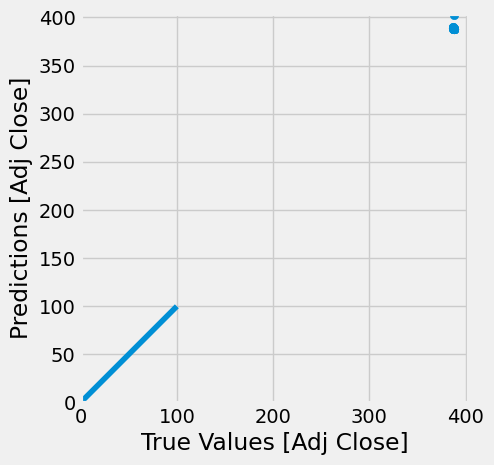

In [ ]:
#plotting Predictions vs. True Values of Adj Close

test_predictions =  model.predict(normed_test_data_1).flatten()

plt.scatter(test_labels_1, test_predictions)
plt.xlabel('True Values [Adj Close]')
plt.ylabel('Predictions [Adj Close]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100,100], [-100,100])

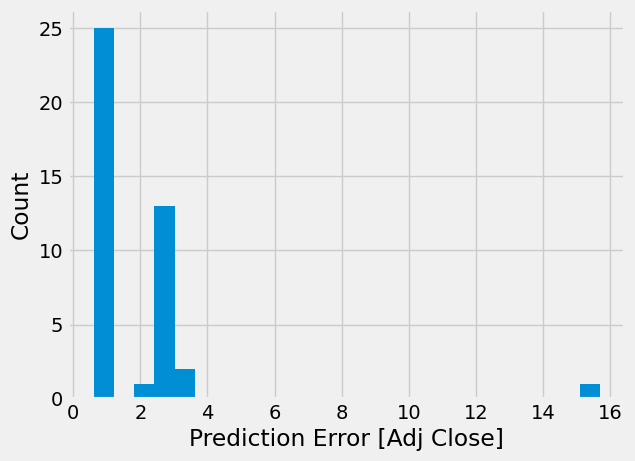

In [ ]:
#plotting Prediction Error of Adj Close

error = test_predictions - test_labels_1
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Adj Close]")
_ = plt.ylabel("Count")
